# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [8]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Really terrible user experi...
1,✅ Trip Verified | Very impressed with BA. Chec...
2,"✅ Trip Verified | LHR - SFO, LAS - LGW August..."
3,Not Verified | I flew from Malaga via LHR to...
4,✅ Trip Verified | Milan to Miami return via L...


In [10]:
df.to_csv("/content/sample_data/Data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [12]:
import pandas as pd

# Read the dataset from a CSV file
df = pd.read_csv('/content/sample_data/Data/BA_reviews.csv')

# Define a function to clean each review
def clean_review(review):
    review = review.replace("✅ Trip Verified | ", "")
    review = review.replace("Not Verified | ", "")
    return review

# Apply the function to the 'review' column
df['reviews'] = df['reviews'].apply(clean_review)

# Save the cleaned data back to a CSV file
df.to_csv('cleaned_reviews.csv', index=False)

In [14]:
df = df.drop(columns=['Unnamed: 0'])

In [16]:
df.tail()

,reviews
995,London to Shanghai. The most disappointing bu...
996,Their customer service is horrible. Lost our b...
997,"London City to Zurich, I fly this route a lot..."
998,I booked a flight from Bucharest to London an...
999,"London to Calgary. Thank you to James, a Club..."


In [19]:
pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.2 MB/s eta 0:00:00


In [20]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to get sentiment scores
def get_sentiment(review):
    return analyzer.polarity_scores(review)

# Apply the function to get sentiment scores for each review
df['sentiment'] = df['reviews'].apply(get_sentiment)

# Extract compound sentiment score for simplicity
df['compound'] = df['sentiment'].apply(lambda x: x['compound'])

# Display the DataFrame with sentiment scores
print(df[['reviews', 'compound']].head())


                                             reviews  compound
0   Really terrible user experience. British Airw...   -0.8488
1  Very impressed with BA. Check in online was a ...    0.9949
2   LHR - SFO, LAS - LGW August 2023 in Club Worl...    0.9380
3    I flew from Malaga via LHR to Boston on the ...   -0.9030
4   Milan to Miami return via London. Worst busin...   -0.8422


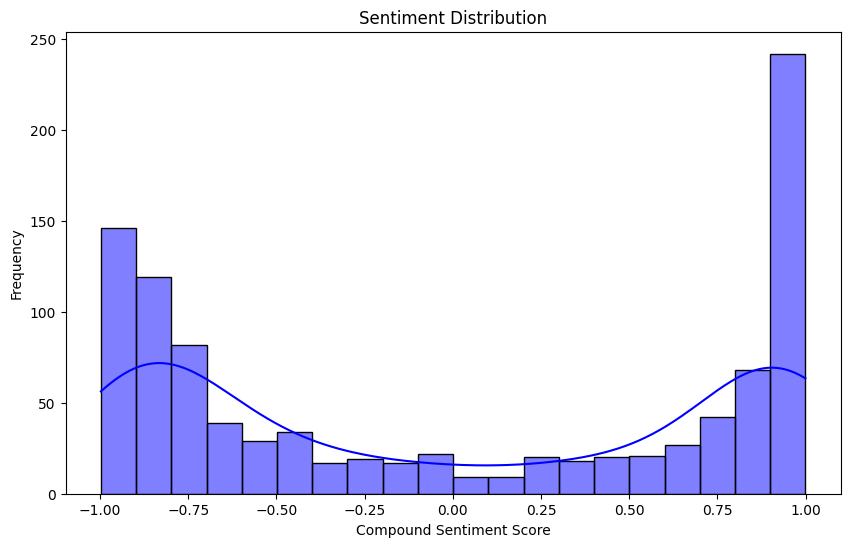

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['compound'], bins=20, kde=True, color='blue')
plt.title('Sentiment Distribution')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.show()


In [23]:
# Calculate key metrics
average_sentiment = df['compound'].mean()
positive_reviews = (df['compound'] > 0).mean() * 100
negative_reviews = (df['compound'] < 0).mean() * 100

print(f"Average Sentiment Score: {average_sentiment:.2f}")
print(f"Percentage of Positive Reviews: {positive_reviews:.2f}%")
print(f"Percentage of Negative Reviews: {negative_reviews:.2f}%")


Average Sentiment Score: 0.00
Percentage of Positive Reviews: 47.60%
Percentage of Negative Reviews: 51.90%


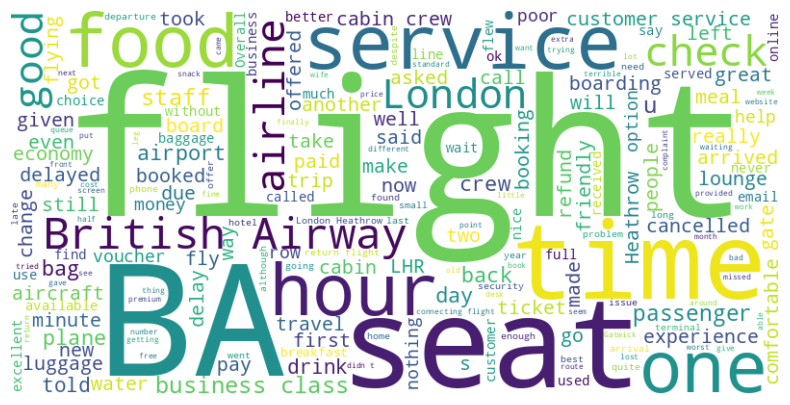

In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Combine all reviews into a single string
all_reviews = ' '.join(df['reviews'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
